In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [54]:
from nltk.corpus import stopwords
structured_data = pd.DataFrame({
    'PatientID' : [1,2,3,4,5],
    'Age' : [34,45,23,50,40],
    'Gender' : ['M','F','F','M','M'],
    'Diagonosis' : ['Diabetes','Hypertension','Asthma','Diabetes','Hypertension']
})
print(structured_data.head())

   PatientID  Age Gender    Diagonosis
0          1   34      M      Diabetes
1          2   45      F  Hypertension
2          3   23      F        Asthma
3          4   50      M      Diabetes
4          5   40      M  Hypertension


In [55]:
unstructured_data = ["Patient has a history of hypertension and diabetes. Prescribed medication X.",
                    "Asthma diagnosis confirmed. Patient advised to use inhaler daily.",
                    "Hypertension patient. Needs regular monitoring of blood pressure.",
                    "Diabetes patient. Recommended diet and exercise.",
                    "Patient diagnosed with hypertension. Medication Y prescribed"]

In [56]:
structured_data.head()
structured_data.isnull().sum()

PatientID     0
Age           0
Gender        0
Diagonosis    0
dtype: int64

In [57]:
structured_data['Gender'] = structured_data['Gender'].map({'M':0,'F':1})
print(structured_data.head())

   PatientID  Age  Gender    Diagonosis
0          1   34       0      Diabetes
1          2   45       1  Hypertension
2          3   23       1        Asthma
3          4   50       0      Diabetes
4          5   40       0  Hypertension


In [58]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+' , '', text)
    text = re.sub(r'\W+' , '',text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [59]:
cleaned_notes = [preprocess_text(note) for note in unstructured_data]
vectorizer = TfidfVectorizer(max_features = 10)
X_tfidf = vectorizer.fit_transform(cleaned_notes).toarray()
pd.DataFrame(X_tfidf,columns = vectorizer.get_feature_names_out()).head()

,asthmadiagnosisconfirmedpatientadvisedtouseinhalerdaily,diabetespatientrecommendeddietandexercise,hypertensionpatientneedsregularmonitoringofbloodpressure,patientdiagnosedwithhypertensionmedicationyprescribed,patienthasahistoryofhypertensionanddiabetesprescribedmedicationx
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


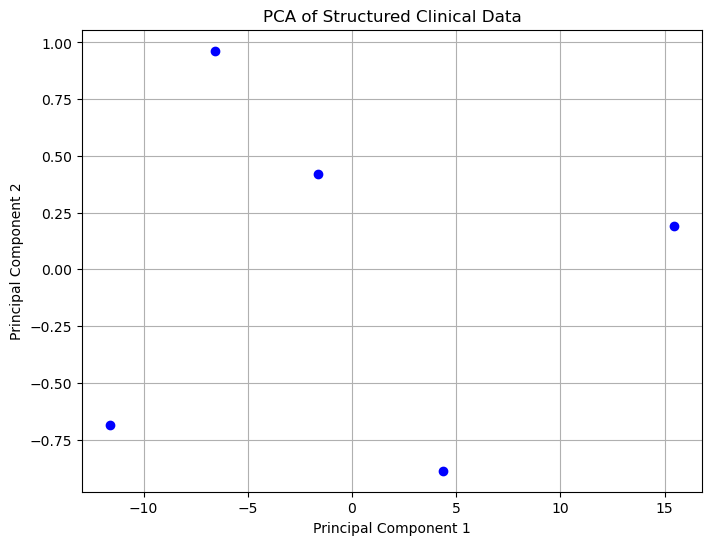

In [60]:
structured_data_encoded = pd.get_dummies(structured_data.drop('PatientID', axis=1))
pca = PCA(n_components=2)
structured_data_pca = pca.fit_transform(structured_data_encoded)
plt.figure(figsize=(8, 6))
plt.scatter(structured_data_pca[:, 0], structured_data_pca[:, 1],
c='blue', marker='o')
plt.title('PCA of Structured Clinical Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

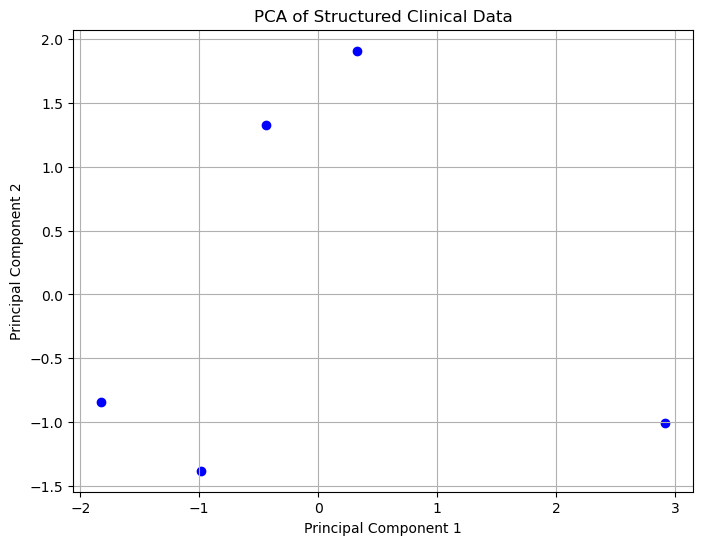

In [61]:
from sklearn.preprocessing import StandardScaler
structured_data_encoded = pd.get_dummies(structured_data.drop('PatientID', axis=1))
scaler = StandardScaler()
structured_data_scaled = scaler.fit_transform(structured_data_encoded)
pca = PCA(n_components=2)
structured_data_pca = pca.fit_transform(structured_data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(structured_data_pca[:, 0], structured_data_pca[:, 1],
c='blue', marker='o')
plt.title('PCA of Structured Clinical Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

C:\Users\DSL-189\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DSL-189\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


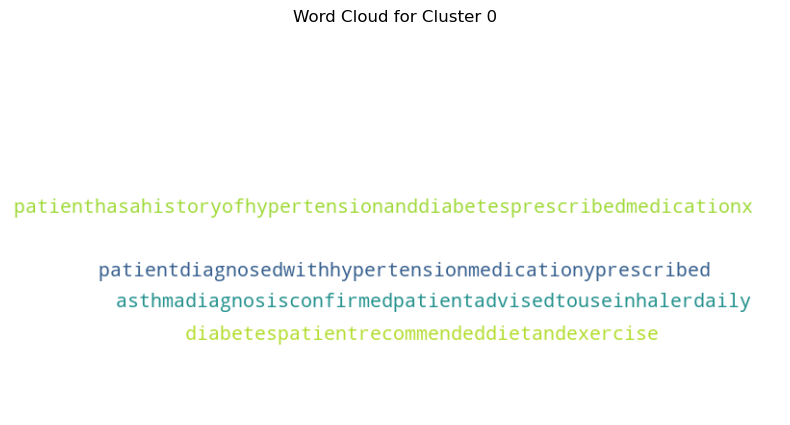

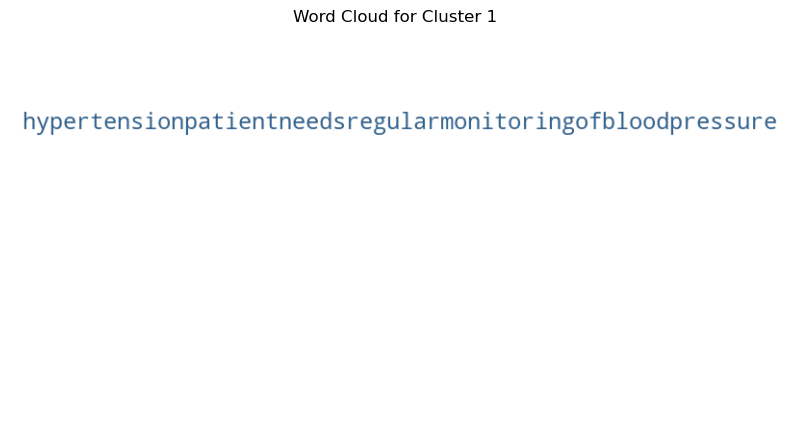

In [52]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(X_tfidf)
for i in range(2):
    cluster_words = ' '.join([cleaned_notes[j] for j in range(len(cleaned_notes)) if kmeans.labels_[j] == i])
    wordcloud = WordCloud(width= 800,height=400,background_color='white').generate(cluster_words)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {i}')
    plt.show()